In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 64

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/home/fourmobro/.fastai/data/oxford-iiit-pet')

In [5]:
path_anno = path/'annotations'
path_img = path/'images'

In [6]:
fnames = get_image_files(path_img)

In [7]:
np.random.seed(265)
pat = r'/([^/]+)_\d+.jpg$'

In [8]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=320, bs=bs)
data.normalize(imagenet_stats)

In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.model = torch.nn.DataParallel(learn.model, device_ids=[0, 1])

In [10]:
learn.fit_one_cycle(10, max_lr=slice(.5e-3))

Total time: 06:14
epoch  train_loss  valid_loss  error_rate
1      2.284009    0.812102    0.137509    (00:50)
2      0.933923    0.311209    0.064670    (00:35)
3      0.482064    0.212768    0.054459    (00:36)
4      0.334751    0.201891    0.057862    (00:36)
5      0.257734    0.172724    0.051055    (00:36)
6      0.216912    0.160334    0.046290    (00:36)
7      0.190913    0.152155    0.046290    (00:36)
8      0.170066    0.154823    0.048332    (00:36)
9      0.153848    0.151518    0.045609    (00:36)
10     0.129332    0.149644    0.048332    (00:36)



In [11]:
learn.save('stage-1-r50-bs64-rs265-lr.5')

In [12]:
learn.load('stage-1-r50-bs64-rs265-lr.5')

In [13]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


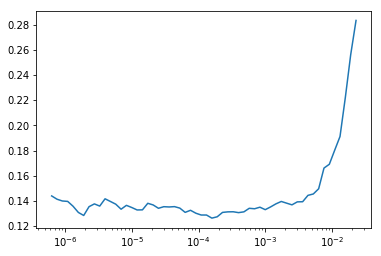

In [14]:
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(10, max_lr=slice(5e-5, 2.5e-5))

Total time: 07:33
epoch  train_loss  valid_loss  error_rate
1      0.129798    0.143297    0.044248    (00:48)
2      0.123331    0.144152    0.042206    (00:44)
3      0.123825    0.148641    0.042886    (00:44)
4      0.117741    0.154695    0.043567    (00:44)
5      0.097502    0.144818    0.051736    (00:45)
6      0.074882    0.140126    0.043567    (00:45)
7      0.059589    0.140116    0.043567    (00:44)
8      0.048443    0.134017    0.040163    (00:44)
9      0.041799    0.126835    0.039483    (00:45)
10     0.043572    0.126432    0.038802    (00:45)



In [16]:
learn.save('stage-2-r50-bs64-rs265-lr.5')
learn.load('stage-2-r50-bs64-rs265-lr.5')

In [17]:
learn.validate()

[0.12643157, 0.03880190772211738]